In [1]:
import graphviz
from keras.models import Sequential
from keras.layers import Dense

# Create a simple neural network
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Visualize the model architecture
def visualize_model(model):
    dot = graphviz.Digraph(comment='Neural Network')
    
    for layer in model.layers:
        if isinstance(layer, Dense):
            layer_name = f"{layer.name}\n{layer.output_shape[1:]}"
            dot.node(layer.name, label=layer_name, shape='box')
    
    for i in range(len(model.layers) - 1):
        dot.edge(model.layers[i].name, model.layers[i + 1].name)
    
    dot.render('neural_network', format='png', cleanup=True)

visualize_model(model)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


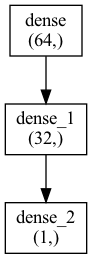

In [5]:
#from keras.utils.vis_utils import plot_model
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
from PIL import Image as PILImage

# Create a simple neural network
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Visualize the model architecture and display it
plot_model(model, to_file='neural_network.png', show_shapes=True)

# Display the image
image_path = 'neural_network.png'
img = PILImage.open(image_path)
display(Image(filename=image_path))


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


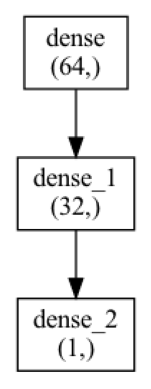

In [8]:

import matplotlib.pyplot as plt

from IPython.display import Image, display

# Create a simple neural network
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Visualize the model architecture and save it to a file
plot_model(model, to_file='neural_network.png', show_shapes=True)

# Display the image using matplotlib
image_path = 'neural_network.png'
img = PILImage.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Create a 4x4 matrix for demonstration
input_matrix = np.array([[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12],
                         [13, 14, 15, 16]])

# Reshape the matrix to a flat vector for input to the autoencoder
input_data = input_matrix.flatten()

# Reshape the input data to a 4x4 matrix for training
input_data = input_data.reshape(1, 16)

In [10]:
input_data

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [11]:
# Define the autoencoder architecture
input_layer = Input(shape=(16,))

# Encoder
encoding_layer = Dense(2, activation='relu')(input_layer)  # Compression: 16 -> 2

encoding_layer

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_12')>

In [ ]:
# Decoder
decoding_layer = Dense(16, activation='linear')(encoding_layer)

# Create the autoencoder model
autoencoder = Model(input_layer, decoding_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(input_data, input_data, epochs=1000, verbose=0)

# Get the compressed representation
compressed_representation = autoencoder.predict(input_data)

print("Original Matrix:")
print(input_matrix)
print("\nCompressed Representation:")
print(compressed_representation)